In [3]:
import pandas as pd #dataframes
import numpy as np #multidimentional array
import seaborn as sns #data visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier


In [7]:
df = pd.read_csv(r"C:\Users\VAIBHAV\Desktop\SQL Notes\diabetes.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#check the null values of the dataset
print('No of zero values in Glucose ',df[df['Glucose']==0].shape[0])


No of zero values in Glucose  5


In [19]:
print('No of zero values in Blood pressure ',df[df['BloodPressure']==0].shape[0])

No of zero values in Blood pressure  35


In [21]:
print('No of zero values in skinthickness ',df[df['SkinThickness']==0].shape[0])


No of zero values in skinthickness  227


In [23]:
print('No of zero values in Insulin ',df[df['Insulin']==0].shape[0])

No of zero values in Insulin  374


In [25]:
print('No of zero values in BMI ',df[df['BMI']==0].shape[0])


No of zero values in BMI  11


In [27]:
#checking
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
print('No. of the zero values in glucose ',df[df['Glucose']==0].shape[0])


No. of the zero values in glucose  0


In [29]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


In [31]:
df.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

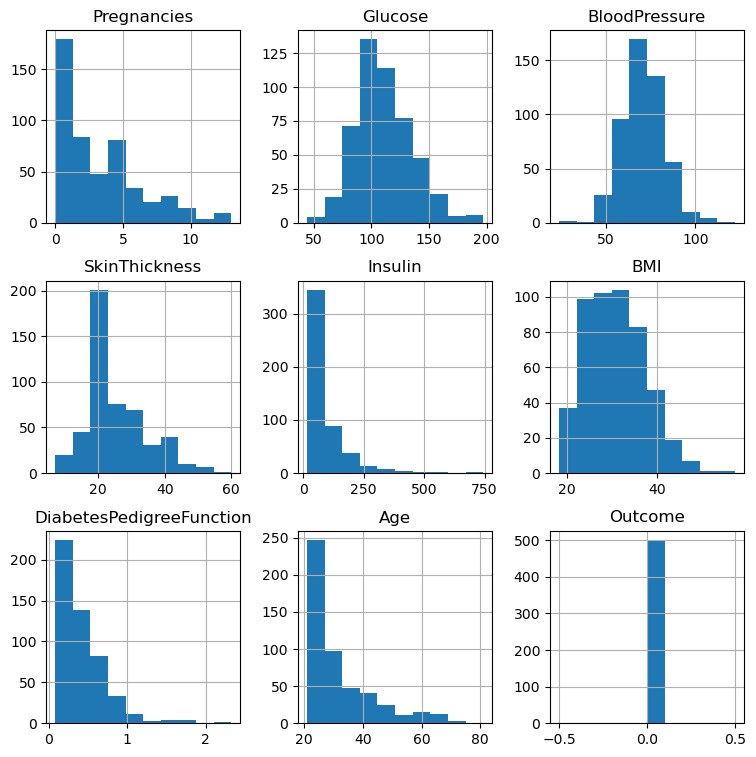

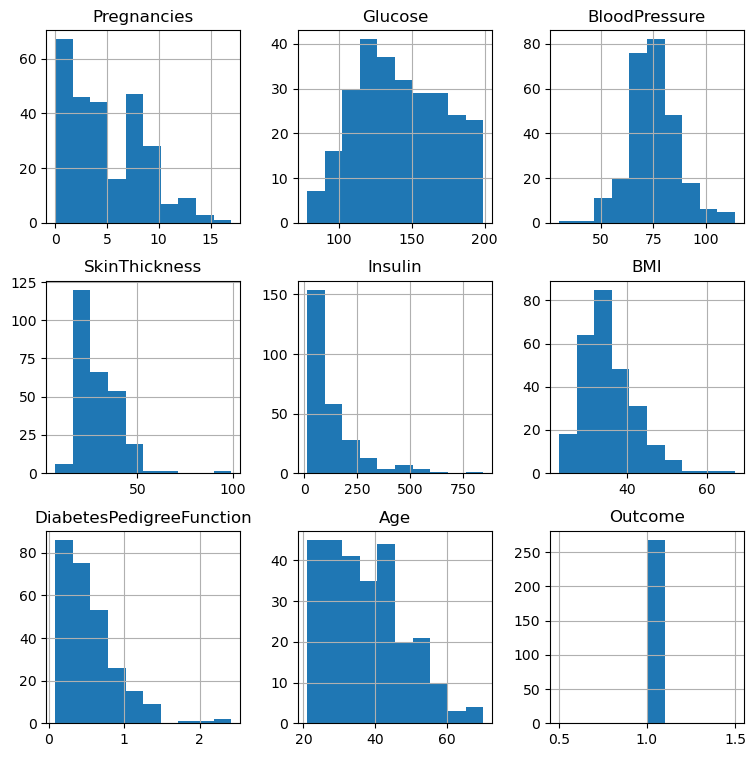

In [33]:
df.groupby('Outcome').hist(figsize=(9, 9))

In [35]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
def median_impute(df):
    pima_median = df.copy()
    pima_median.Glucose.replace(to_replace=0, value= np.NaN, inplace= True)
    pima_median.BloodPressure.replace(to_replace=0, value=np.NaN, inplace= True)
    pima_median.SkinThickness.replace(to_replace=0, value=np.NaN, inplace= True)
    pima_median.Insulin.replace(to_replace=0, value=np.NaN, inplace= True)
    pima_median.BMI.replace(to_replace=0, value=np.NaN, inplace= True)
    pima_median.DiabetesPedigreeFunction.replace(to_replace=0, value=np.NaN, inplace= True)
    pima_median.Age.replace(to_replace=0, value=np.NaN, inplace= True)
    cols = pima_median.columns
    data = pima_median.values
    simple_impute = SimpleImputer( strategy= 'median')
    simple_impute.fit(data)
    pima_impute_median = simple_impute.transform(data)
    pima_impute_median = pd.DataFrame(pima_impute_median, columns= cols)
    pima_impute_median.fillna(0)
    print('-------Median Complete-------')
    return(pima_impute_median)



Number of patients without diabetes: 500
Number of patients with diabetes: 268


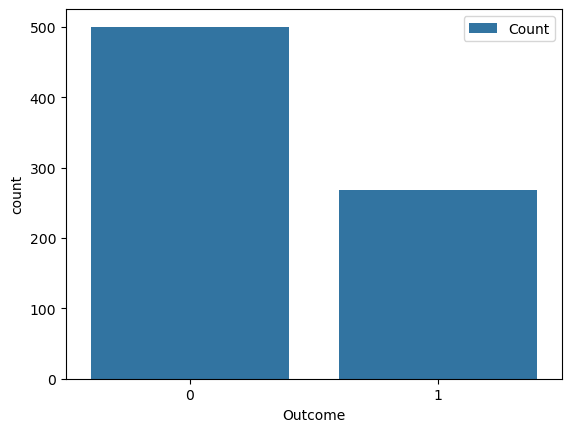

In [41]:
sns.countplot(data=df, x = 'Outcome', label='Count')
LD, NLD = df['Outcome'].value_counts()
print('Number of patients without diabetes: {}'.format(LD))
print('Number of patients with diabetes: {}'.format(NLD))

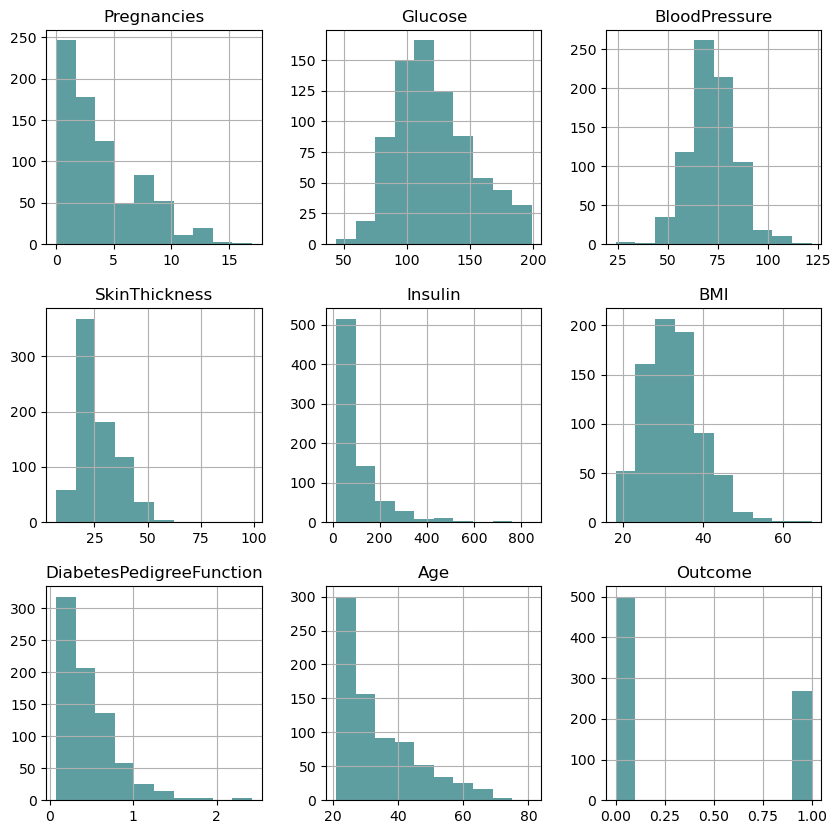

In [43]:
df.hist(figsize = (10,10), color= "#5F9EA0")
plt.show()

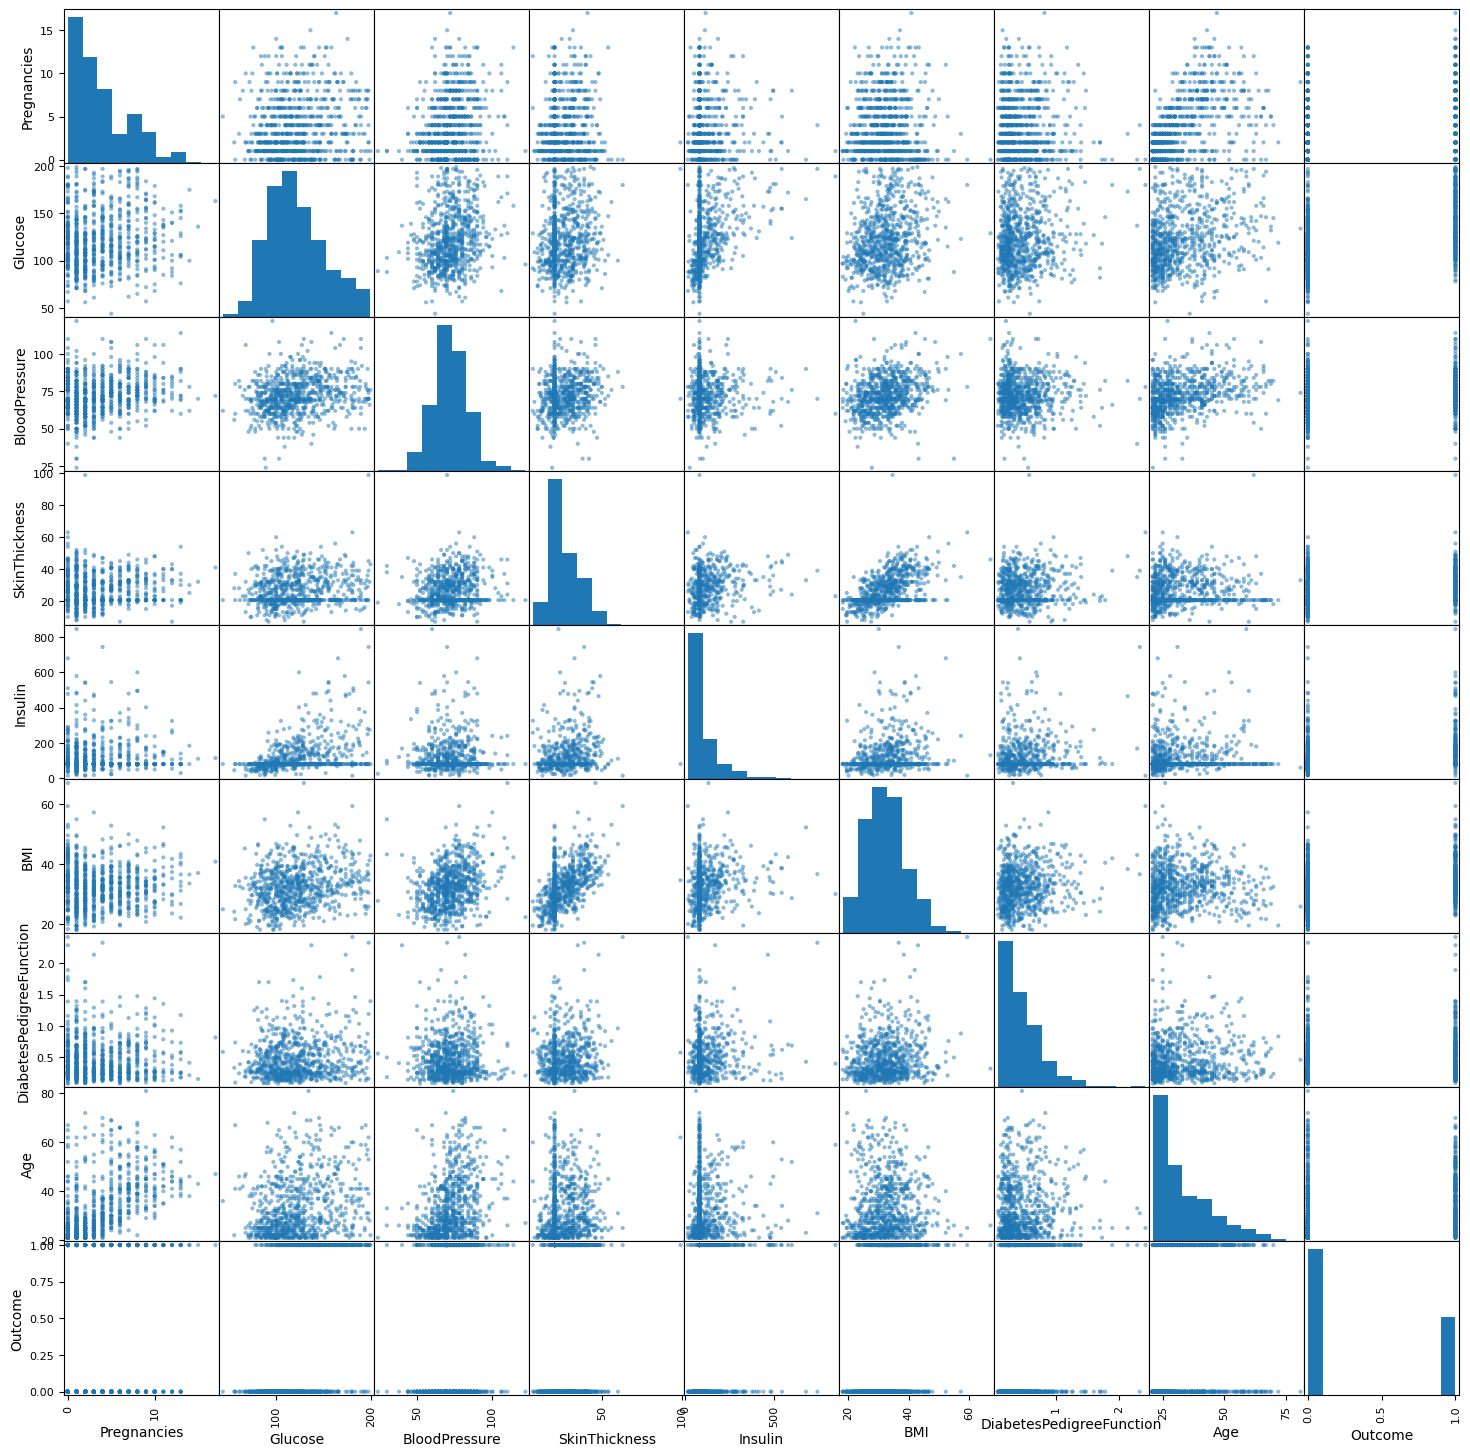

In [47]:
#scatter plot
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
scatter_matrix(df ,figsize = (18,18))
pyplot.show()

In [49]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [51]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23,0


In [53]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [55]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.6 , random_state = 101)

In [81]:
## by applying the "Random forest algorthm"
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [83]:
rfc_train = rfc.predict(x_train)
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))


Accuracy_Score = 1.0


In [85]:
from sklearn import metrics
predictions = rfc.predict(x_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.737527114967462


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


[[245  56]
 [ 65  95]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       301
           1       0.63      0.59      0.61       160

    accuracy                           0.74       461
   macro avg       0.71      0.70      0.71       461
weighted avg       0.73      0.74      0.74       461



In [89]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [91]:
from sklearn import metrics
predictions = dtree.predict(x_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7071583514099783


In [93]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[239  62]
 [ 73  87]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       301
           1       0.58      0.54      0.56       160

    accuracy                           0.71       461
   macro avg       0.67      0.67      0.67       461
weighted avg       0.70      0.71      0.70       461



In [95]:
# SVM support vector machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)


SVC()

In [97]:
svc_pred = svc_model.predict(x_test)

In [99]:
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7158351409978309


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[254  47]
 [ 84  76]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       301
           1       0.62      0.47      0.54       160

    accuracy                           0.72       461
   macro avg       0.68      0.66      0.67       461
weighted avg       0.71      0.72      0.71       461



In [103]:
#The Conclusion from Model Building
#Therefore Random forest is the best model for this prediction since it has an according to
rfc.feature_importances_


array([0.07067013, 0.29914044, 0.08654389, 0.06320425, 0.07584913,
       0.16965959, 0.10049579, 0.13443677])

<Axes: >

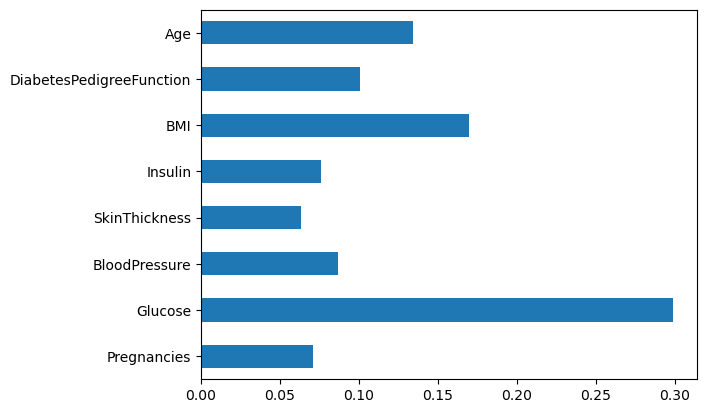

In [105]:
(pd.Series(rfc.feature_importances_, index=x.columns).plot(kind='barh'))

In [107]:
import pickle
# using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)
# loading that saved model
rfc_from_pickle = pickle.loads(saved_model)
# use this to make predictions
rfc_from_pickle.predict(x_test)


array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

In [109]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [115]:
# person have the chance to have the diabities
#(pregnancies , glucose , BloodPresure , Skin Thickness , Insulin level , BMI , D
# result
# 1 = person have the chance to suffer by diabities
# 0 = person have no chance to suffer by diabities
rfc.predict([[1,3257.0,0,137,40,35,168,43.1]])

array([1], dtype=int64)